<a href="https://colab.research.google.com/github/MarioSigal/Procesamiento-de-Imagenes-/blob/main/Laboratorios/Laboratorio1_Pdi20251.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Laboratorio 1: Operadores Puntuales e Histograma

## 1. **Operadores Puntuales**



Los Operadores Puntuales son funciones matemáticas que mapean los niveles de gris de una imagen a otros niveles de gris, obteniendo una nueva imagen. Estos operadores trabajan de manera píxel a píxel, modificando los valores sin tener en cuenta su relación con otros píxeles en la imagen (es decir, no consideran su vecindad).

### ***Ejemplo de Operadores Puntuales***:

-   **Transformación lineal**: Una de las transformaciones más simples es multiplicar cada nivel de gris por un factor constante $n$, como $x→x⋅n$, donde $x$ es el valor de gris de un píxel en la imagen. Esta es una transformación puntual simple que puede hacer que la imagen sea más brillante (si $n>1$) o más oscura (si $n<1$).
- **Transformaciones no lineales**: Como las funciones exponenciales o logarítmicas, que son útiles cuando se desea comprimir o expandir ciertos rangos de intensidad en una imagen.
    -   Ejemplo: $x=log⁡(x+1) \cdot x$ que oscurece las áreas brillantes y resalta las áreas oscuras.

-   **Escala de grises**: Otro tipo de transformación puntual podría ser simplemente reemplazar los niveles de gris de la imagen por un valor constante: $x→c$. Esto puede ser util para crear una imagen binaria (blanco y negro), lo que es útil para técnicas como la segmentación.


In [ ]:
# Funcion que devuelve un gradiante en escala de grises de 256x256 en uint8
def gradiante():
  grandiante = np.arange(0,256).reshape(-1,256).astype(np.uint8)
  grandiante = np.tile(grandiante, (256, 1))
  return grandiante

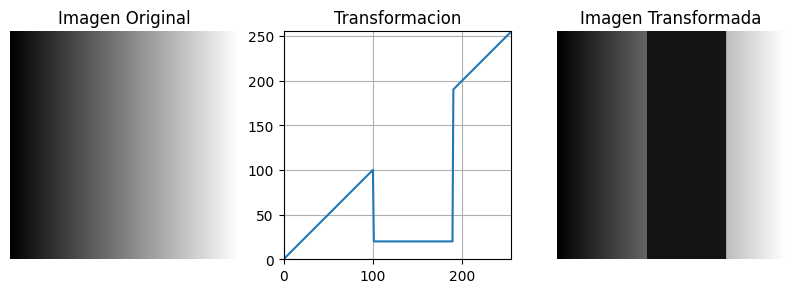

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

# Definimos una transformacion puntual, de nivel de gris a nivel de gris
# Si modifican esta funcion, tenga cuidado de tener en cuenta overflowing del tipo de dato
# (Ver hoja de ayuda)
def T(x):
  if x > 100 and x < 190:
    return 20
  return x

# np.vectorize transforma nuestra funcion para ser aplicada correctamente aplicada
# elemento a elemento
vectorize_T = np.vectorize(T)

# Creamos un Gradiante simple 256 x 256
gradianteOriginal = gradiante()

# Aplicamos la transformacion puntual en el gradiante
gradianteTransformado = vectorize_T(gradiante())

# Mostramos el resultado de la transformacion
fig, axs = plt.subplots(1,3, figsize=(10,10))

axs[0].imshow(gradianteOriginal, cmap='gray', clim=(0,255))
axs[0].set_title("Imagen Original")
axs[0].axis("off")

# Mostramos la representacion de la Transformacion sobre los niveles de gris
axs[1].plot(np.arange(0,256),vectorize_T(np.arange(0,256)))
axs[1].set_title("Transformacion")
axs[1].set_xlim(0, 255)
axs[1].set_ylim(0, 255)
axs[1].set_aspect('equal')
axs[1].grid(True)

axs[2].imshow(gradianteTransformado, cmap='gray', clim=(0,255))
axs[2].set_title("Imagen Transformada")
axs[2].axis("off")

plt.show()

###1. **Multiplicacion**

Crear una familia de Transformaciones Puntuales de la forma `x⋅n`, donde **x** es el nivel de gris original y **n** un numero natural.

Recuerden que la imagen resultante de aplicar la Transformacion debe tener un formato y rango valido.

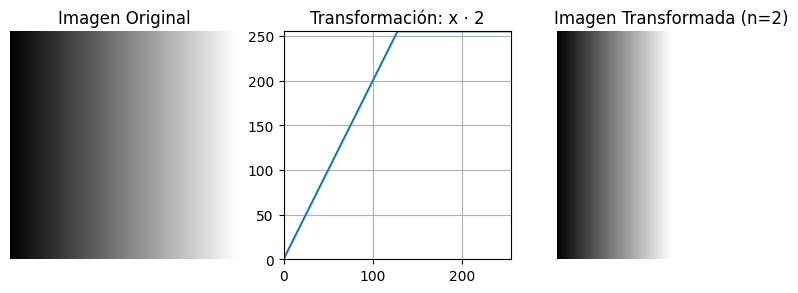

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

# Deben definir una transformacion puntual de nivel de gris a nivel de gris.
# Tengan en cuenta Overflowing del tipo de dato (Ver hoja de ayuda)
# Piensen en mover el tipo de dato a uno de mas presicion y despues utilizar np.clip
def T(x, n):

  return np.clip(x*n,0,255)

vectorize_T = np.vectorize(T)

# Creamos un Gradiante simple 256 x 256
gradianteOriginal = gradiante()

# Numero al Multiplicar
n = 2

# Aplicamos la transformacion puntual en el gradiante
gradianteTransformado = vectorize_T(gradiante(), n)

# Mostramos el resultado de la transformacion
fig, axs = plt.subplots(1,3, figsize=(10,10))

axs[0].imshow(gradianteOriginal, cmap='gray', clim=(0,255))
axs[0].set_title("Imagen Original")
axs[0].axis("off")

# Mostramos la representacion de la Transformacion sobre los niveles de gris
axs[1].plot(np.arange(0,256),vectorize_T(np.arange(0,256), n))
axs[1].set_title(f"Transformación: x ⋅ {n}")
axs[1].set_xlim(0, 255)
axs[1].set_ylim(0, 255)
axs[1].set_aspect('equal')
axs[1].grid(True)

axs[2].imshow(gradianteTransformado, cmap='gray', clim=(0,255))
axs[2].set_title(f"Imagen Transformada (n={n})")
axs[2].axis("off")

plt.show()

###2. **Invertir**

Crear una Transformaciones Puntual que dada una imagen, devuelva su **negativo**. Comparar su resultado con la implementacion de **Scikit-Image**

Recuerden que la imagen resultante de aplicar la Transformacion debe tener un formato y rango valido.

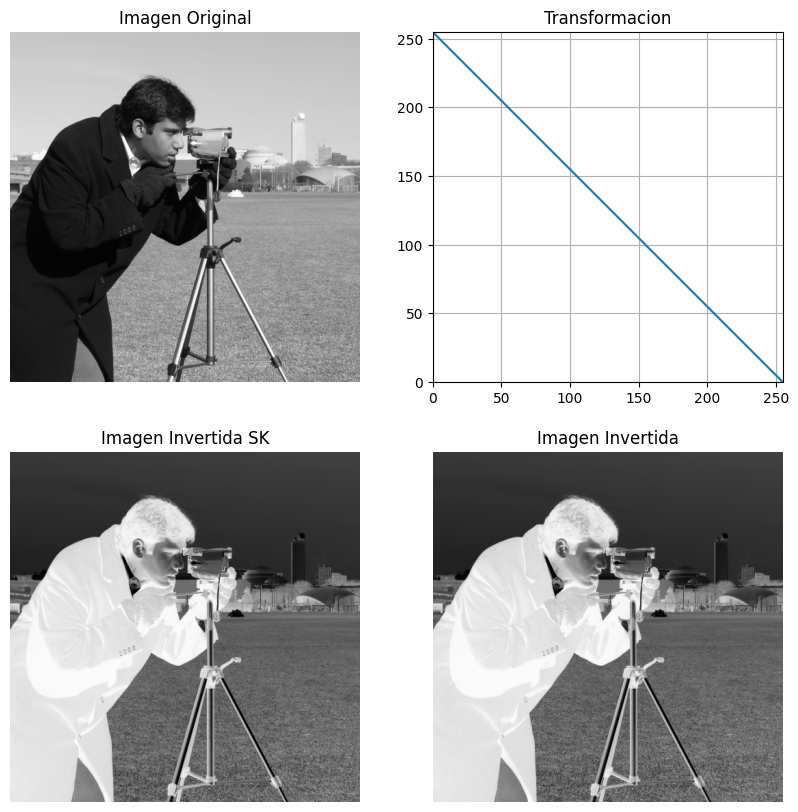

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, util


# Definimos una transformacion puntual, de nivel de gris a nivel de gris
def T(x):

  return 255-x

vectorize_T = np.vectorize(T)

# Cargamos una imagen de ejemplo
imagenOriginal = data.camera()

# Aplicamos la transformacion puntual en la imagen
imagenInvertida = vectorize_T(imagenOriginal.copy())
imagenInvertidaSK = util.invert(imagenOriginal.copy())

fig, axs = plt.subplots(2,2, figsize=(10,10))
axs = axs.ravel()

axs[0].imshow(imagenOriginal, cmap='gray', clim=(0,255))
axs[0].set_title("Imagen Original")
axs[0].axis("off")

# Mostramos la representacion de la Transformacion sobre los niveles de gris
axs[1].plot(np.arange(0,256),vectorize_T(np.arange(0,256)))
axs[1].set_title("Transformacion")
axs[1].set_xlim(0, 255)
axs[1].set_ylim(0, 255)
axs[1].set_aspect('equal')
axs[1].grid(True)

axs[2].imshow(imagenInvertidaSK, cmap='gray', clim=(0,255))
axs[2].set_title("Imagen Invertida SK")
axs[2].axis("off")

axs[3].imshow(imagenInvertida, cmap='gray', clim=(0,255))
axs[3].set_title("Imagen Invertida")
axs[3].axis("off")

plt.show()

### 3. **Threshold**


Implementar una funcion que dada una imagen y un valor de umbral, devuelva una **Imagen binarizada** (cada valor es estrictamente 0 o 255)

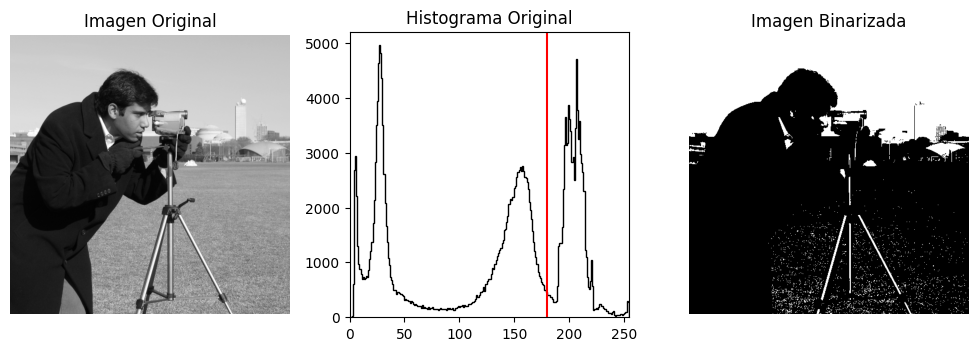

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

# Creamos una funcion para crear una copia de la imagen binarizada
def BinarizarImagen(imagen, umbral):
  imgB = imagen.copy()
  imgB[imgB<=umbral] = 0
  imgB[imgB>umbral]=255
  return imgB

UMBRAL = 180

# Cargamos una imagen de ejemplo
imagenOriginal = data.camera()

# Creamos la imagen binarizada
imagenBin = BinarizarImagen(imagenOriginal, UMBRAL)

fig, axs = plt.subplots(1,3, figsize=(10,10))

axs[0].imshow(imagenOriginal, cmap='gray', clim=(0,255))
axs[0].set_title("Imagen Original")
axs[0].axis("off")

#mostramos el rango de valores
axs[1].set_title("Histograma Original")
axs[1].set_xlim(0, 255)
axs[1].set_aspect(0.05)
axs[1].hist(imagenOriginal.ravel(), bins=256, histtype='step', color='black')
axs[1].axvline(x = UMBRAL, color = 'r', label = 'Umbral')
plt.tight_layout()

axs[2].imshow(imagenBin, cmap='gray', clim=(0,255))
axs[2].set_title("Imagen Binarizada")
axs[2].axis("off")

plt.show()

## **CHECKPOINT 1!!!**

## 2. **Histograma**

Un **histograma** es una herramienta poderosa en el procesamiento de imágenes que nos permite abstraer y describir el contenido de una imagen enfocándonos únicamente en los **niveles de gris**.

### ***¿Cómo funciona un histograma?***

-   Un histograma se construye dividiendo los posibles valores de los niveles de gris (en imágenes en escala de grises) en intervalos llamados **bins**.
-   Los **bins** definen la resolución del histograma y nos dicen si estamos observando cada nivel de gris por separado o si agrupamos varios niveles cercanos.

### ***Ejemplo de Bins***:

-   Si tenemos un histograma con **256 bins**, estamos considerando cada nivel de gris individualmente, lo que significa que estamos contando cuántos píxeles tienen un valor de gris específico, del 0 al 255.
-   Si, en cambio, utilizamos solo **2 bins**, agruparemos los niveles de gris en dos categorías: uno para los píxeles con niveles de gris menores a 127 (valores oscuros) y otro para los niveles de gris mayores o iguales a 127 (valores claros).

De esta forma, el histograma con 2 bins proporcionará solo una visión muy simplificada de la imagen, mientras que uno con 256 bins proporcionará una visión detallada, donde cada nivel de gris se cuenta por separado.

### ***Visualización de un histograma***

Al analizar el histograma de una imagen, podemos obtener información clave como:

-   **Distribución de brillo**: Si la imagen tiene un histograma desplazado hacia la izquierda, significa que la imagen es más oscura. Si está hacia la derecha, será más brillante.
-   **Contraste**: Un histograma que cubre un rango amplio de niveles de gris indica una imagen con buen contraste, mientras que un histograma estrecho indica que los tonos de gris son muy similares entre sí, lo que da lugar a una imagen con bajo contraste.
-   **Histograma plano vs. sesgado**: Si el histograma está muy concentrado en un solo rango, puede indicar problemas de sobreexposición (histograma sesgado hacia los valores más altos) o subexposición (histograma sesgado hacia los valores más bajos).

###1. Crear Histograma

Crear una funcion que dada una imagen uint8 y un numero de bins, devuelve su histograma (un array de numpy con la cantidad de pixeles que le pertenecen a cada bin).

Por obvias razones no pueden utilizar `numpy.histogram`

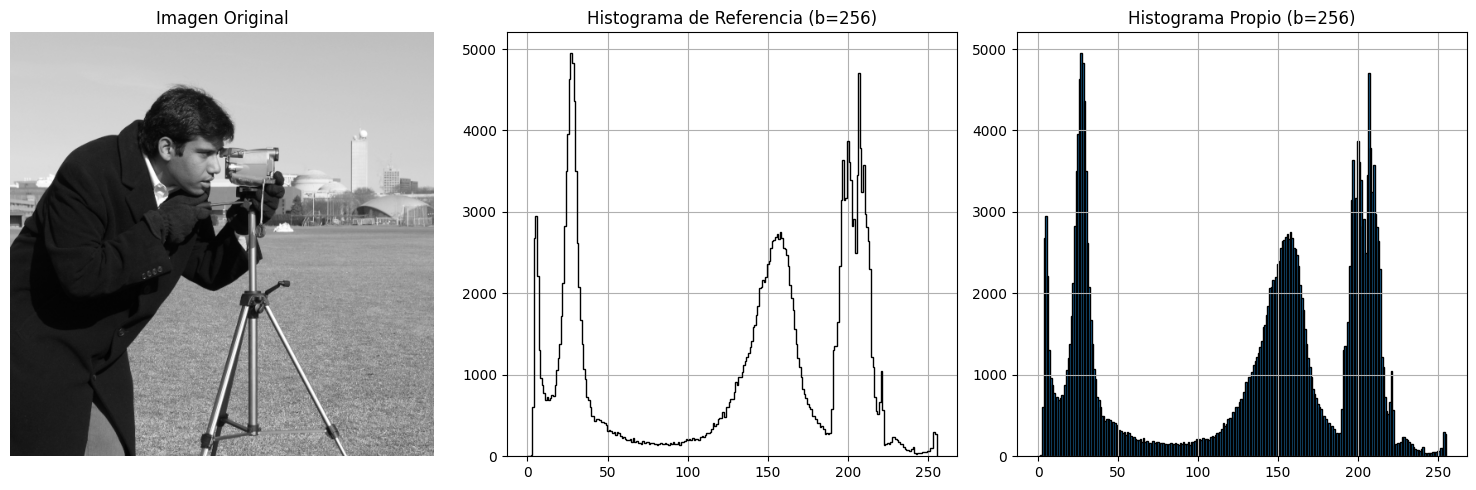

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

# Para que sea mas facil de pensar, pueden dividir la funcion en tres casos:
# bins == 1, bins == 256, el resto.
# Pueden utilizar la funcion np.linspace si les resulta util.
def Histograma(imagen, bins):

  hist = np.zeros(bins)
  #COMPLETAR
  if(bins == 1):
  # Si hay un solo bin, todos los pixeles deberían de entrar en el
    hist[0]= imagen.size
  elif(bins == 256):
  # Si hay 256 bins, hay uno por cada nivel de gris, entonces contamos cuantos pixels tienen cada nivel
    for valor in imagen.ravel():
      hist[valor] += 1
  else:
    # Separamos el rango de [0, 255] en bins - 1 puntos equidistantes
    binMaxs = np.linspace(0, 255, bins-1)
    # Agregamos 256 al final del arreglo
    binMaxs = np.append(binMaxs, 256)
    # Vemos en que bin entra cada pixel, segun en que rango se encuentra
    a=0
    for i in range(len(binMaxs)):
      b= binMaxs[i]
      for valor in imagen.ravel():
        if a <= valor < b:
          hist[i]+=1
      a= binMaxs[i]
    #Seguro se puede hacer en menor complejidad
  return hist

BINS = 256

imagenOriginal = data.camera()
hist = Histograma(imagenOriginal, BINS)

# Mostramos el resultado
fig, axs = plt.subplots(1,3, figsize=(15,5))

axs[0].imshow(imagenOriginal, cmap='gray', clim=(0,255))
axs[0].set_title("Imagen Original")
axs[0].axis("off")

# Histograma de Referencia
# No es necesario que sea igual, ya que dependiendo de como manejen
# los puntos flotantes, puede cambiar ligeramente.
# Concentrense en que la silueta sea similar.
axs[1].set_title(f"Histograma de Referencia (b={BINS})")
axs[1].grid(True)
axs[1].hist(imagenOriginal.ravel(), bins=BINS, histtype='step', color='black')

# Histograma de ustedes
axs[2].set_title(f"Histograma Propio (b={BINS})")
axs[2].grid(True)
axs[2].bar(range(BINS), hist, width=1, edgecolor="black")

plt.tight_layout()
plt.show()